# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [58]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

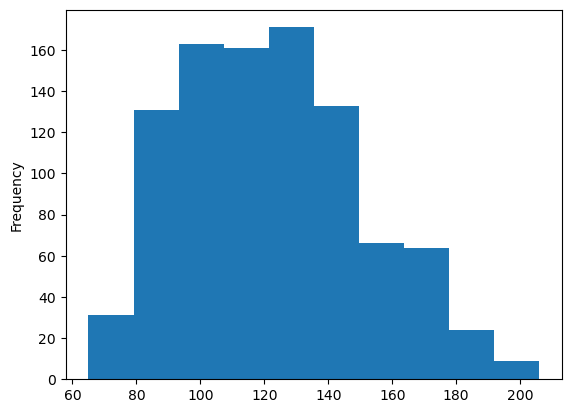

In [31]:
df['bpm'].plot(kind='hist')
df['bpm'].describe()


key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

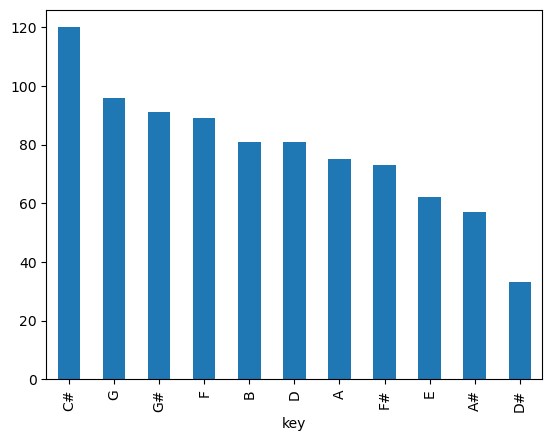

In [62]:

df['key'].value_counts().plot(kind='bar')
df['key'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

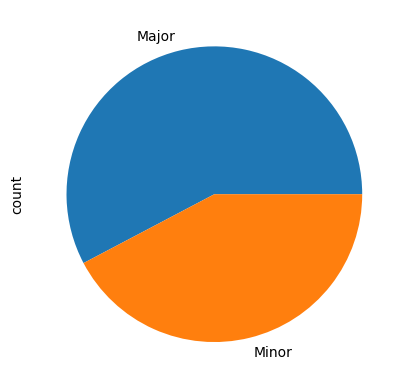

In [64]:
df['mode'].value_counts().plot(kind='pie')
df['mode'].value_counts()

count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64

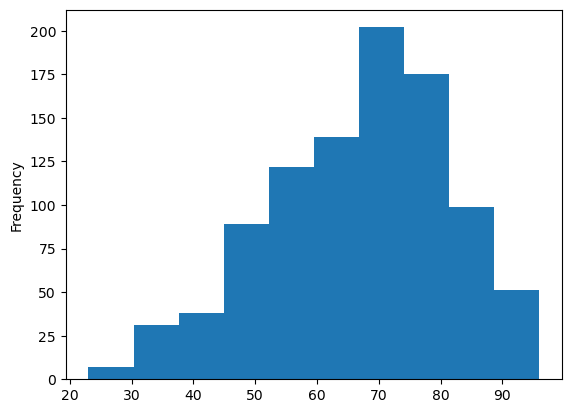

In [39]:
df['danceability_'].plot(kind='hist')
df['danceability_%'].describe()

count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64

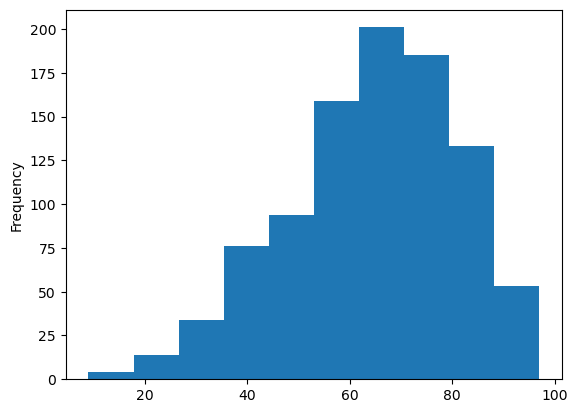

In [41]:
df['energy_%'].plot(kind='hist')
df['energy_%'].describe()

count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64

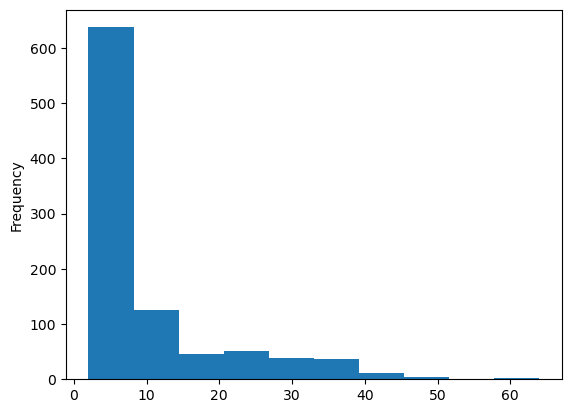

In [42]:
df['speechiness_%'].plot(kind='hist')
df['speechiness_%'].describe()

count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64

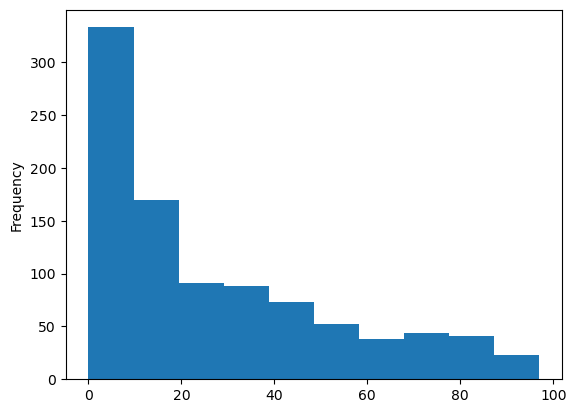

In [43]:

df['acousticness_%'].plot(kind='hist')
df['acousticness_%'].describe()

In [56]:

filtered_df = df.loc[(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['danceability_%'] >=60) & (df['danceability_%'] <=80) & (df['mode'] == 'Major')
& (df['key'] == 'C#') & (df['energy_%'] >=60) & (df['energy_%'] <=80) & (df['speechiness_%'] >=4) & (df['speechiness_%'] <=12) &
(df['acousticness_%'] >=15) & (df['acousticness_%'] <= 45) ]

filtered_df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
518,Need To Know,Doja Cat,1,2021,6,11,6672,0,1042568408,125,...,130,C#,Major,66,19,61,30,0,9,7


In [57]:
filtered_df = df.loc[ df['track_name'] == 'Blinding Lights']
filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7



Part 1:
    BPM - Between 100 & 140 percent
    Key = C#
    Mode = Major
    Danceability - Between 60 & 80 percent
    Energy - Between 60 and 80 percent
    Speechiness - Between 4 & 12 percent
    Acousticness - 15 & 45 percent

Part 2:
    Using the values in the filter above it gave me a single song being "Need to Know" from Doja Cat. I believe the song was popular with it reaching bilboards top 10 in the weekly charts and 68 for the global charts in 2021 and 64 for 2022.

Part 3: 
    The song I chose for a smash hit was Blinding Lights by the Weeknd. compared to the values listed in part 1 and the code above it matches the key, mode, energy_%, and speechiness_% but wiht the bpm being higher than what I gave for a range and with the danceability and acousticness being lower than the range I gave.

    
